# OpenCV

## 安裝

In [ ]:
# 若沒有安裝過 OpenCV，請先安裝(取消註解，只需安裝一次)
# !pip install opencv-python

In [2]:
import cv2
print(cv2.__version__)

4.8.0


## 讀取與顯示

In [3]:
import cv2

# 讀取圖片
image = cv2.imread('example.png')

# 顯示圖片
cv2.imshow('Image', image)

# 等待按鍵，並關閉視窗
cv2.waitKey(0)
cv2.destroyAllWindows()

-1

In [9]:
image.shape

(1066, 1600, 3)

In [2]:
import cv2

# 讀取圖片
image = cv2.imread('example.png')

# 儲存圖片
cv2.imwrite('output.png', image)

True

## 圖片基本操作

### 裁切

In [16]:
# 裁切圖片
cropped_image = image[600:900, 500:800]

# 顯示原圖和裁切後的圖片
cv2.imshow('Original Image', image)
cv2.imshow('Cropped Image', cropped_image)

# 等待按鍵，並關閉視窗
cv2.waitKey(0)
cv2.destroyAllWindows()

-1

### 縮放

In [17]:
# 縮放圖片
scaled_image = cv2.resize(image, (300, 200)) # (寬, 高)

# 顯示原圖和縮放後的圖片
cv2.imshow('Original Image', image)
cv2.imshow('Scaled Image', scaled_image)

# 等待按鍵，並關閉視窗
cv2.waitKey(0)
cv2.destroyAllWindows()

-1

### 平移

In [10]:
import numpy as np

In [22]:
# 設定平移向量
tx = 500
ty = 300
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

# 平移圖片
translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))

# 顯示原圖和平移後的圖片
cv2.imshow('Original Image', image)
cv2.imshow('Translated Image', translated_image)

# 等待按鍵，並關閉視窗
cv2.waitKey(0)
cv2.destroyAllWindows()

-1

### 旋轉

In [21]:
# 獲取圖片尺寸
(h, w) = image.shape[:2]

# 設定旋轉中心和角度
center = (w // 2, h // 2)
angle = 45

# 獲取旋轉矩陣
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0) # (中心點, 角度, 縮放比例)

# 旋轉圖片
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h)) # (圖片, 旋轉矩陣, 圖片尺寸)

# 顯示原圖和旋轉後的圖片
cv2.imshow('Original Image', image)
cv2.imshow('Rotated Image', rotated_image)

# 等待按鍵，並關閉視窗
cv2.waitKey(0)
cv2.destroyAllWindows()

-1

## 影像特徵提取

### 色彩直方圖

In [24]:
import matplotlib.pyplot as plt

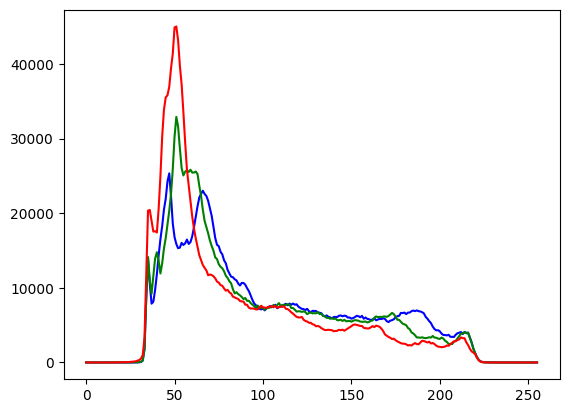

In [25]:
# 轉換為RGB格式
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

color = ('b','g','r')

# 我們現在分別對RGB通道進行計算並繪製直方圖
for i,col in enumerate(color):
    hist = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(hist,color = col)

plt.show()


### 梯度方向圖

In [29]:
gray = cv2.imread("example.png", cv2.IMREAD_GRAYSCALE)
gray_norm = np.float32(gray)/255.0

# 計算梯度
gx = cv2.Sobel(gray_norm, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(gray_norm, cv2.CV_32F, 0, 1, ksize=1)

# 計算梯度大小和方向
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

In [31]:
# 建立一個空白圖像，用於繪製箭頭
h, w = gray.shape
arrow_image = np.zeros((h, w, 3), dtype=np.uint8)

# 設定箭頭繪製的區域大小
cell_size = 10

# 繪製箭頭
for y in range(0, h, cell_size):
    for x in range(0, w, cell_size):
        # 獲取梯度大小和方向的平均值
        avg_mag = np.mean(mag[y:y+cell_size, x:x+cell_size]) * 50
        avg_angle = np.mean(angle[y:y+cell_size, x:x+cell_size])

        # 計算箭頭的起點和終點
        x1, y1 = x + cell_size // 2, y + cell_size // 2
        x2 = int(x1 + avg_mag * np.cos(np.deg2rad(avg_angle)))
        y2 = int(y1 + avg_mag * np.sin(np.deg2rad(avg_angle)))

        # 繪製箭頭
        cv2.arrowedLine(arrow_image, (x1, y1), (x2, y2), (0, 255, 0), 1, tipLength=0.3)

# 顯示箭頭圖像
cv2.imshow("Arrow Image", arrow_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

-1

## 基本影像處理

### 灰階

In [13]:
# 灰階化
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 顯示原圖和灰階圖像
cv2.imshow('Original Image', image)
cv2.imshow('Gray Image', gray_image)

# 等待按鍵，並關閉視窗
cv2.waitKey(0)
cv2.destroyAllWindows()

-1

### 二值化

In [37]:
# 二值化
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# 顯示原圖和二值圖像
cv2.imshow('Original Image', image)
cv2.imshow('Binary Image', binary_image)

# 等待按鍵，並關閉視窗
cv2.waitKey(0)
cv2.destroyAllWindows()

-1

### 平滑

In [8]:
# 平滑
smooth_image = cv2.GaussianBlur(image, (49, 49), 0) # 設定平滑的程度，範圍越大越平滑

# 顯示原圖和平滑後的圖像
cv2.imshow('Original Image', image)
cv2.imshow('Smooth Image', smooth_image)

# 等待按鍵，並關閉視窗
cv2.waitKey(0)
cv2.destroyAllWindows()

-1

### 銳化

In [11]:
# 定義銳化核
sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])

# 銳化
sharpen_image = cv2.filter2D(image, -1, sharpen_kernel)

# 顯示原圖和銳化後的圖像
cv2.imshow('Original Image', image)
cv2.imshow('Sharpen Image', sharpen_image)

# 等待按鍵，並關閉視窗
cv2.waitKey(0)
cv2.destroyAllWindows()

-1

### 邊緣檢測

In [14]:
# 邊緣檢測
edge_image = cv2.Canny(gray_image, 100, 200)

# 顯示原圖和邊緣圖像
cv2.imshow('Original Image', image)
cv2.imshow('Edge Image', edge_image)

# 等待按鍵，並關閉視窗
cv2.waitKey(0)
cv2.destroyAllWindows()

-1